### Feature Scaling

With any distance based machine learning model (regularized regression methods, neural networks, and now kmeans), you will want to scale your data.  

If you have some features that are on completely different scales, this can greatly impact the clusters you get when using K-Means. 

In this notebook, you will get to see this first hand.  To begin, let's read in the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as p
from sklearn.datasets import make_blobs

%matplotlib inline

# plt.rcParams['figure.figsize'] = (16, 9)
# import helpers2 as h
# import tests as t

In [2]:
# Create the dataset for the notebook
# data = h.simulate_data(200, 2, 4)
data, classes = make_blobs(n_samples=200, n_features=2, centers=4, random_state=42)

# DataFrame　に　変換
df           = pd.DataFrame(data)
df.columns   = ['height', 'weight']

# 高さ = 100倍
df['height'] = np.abs(df['height']*100)

# 幅 = normal( 平均、標準偏差、データ数　)
df['weight'] = df['weight'] + np.random.normal(50, 10, 200)

`1.` Next, take a look at the data to get familiar with it.  The dataset has two columns, and it is stored in the **df** variable.  It might be useful to get an idea of the spread in the current data, as well as a visual of the points.  

In [3]:
#Take a look at the data
print( df.describe() )

            height      weight
count   200.000000  200.000000
mean    569.726207   54.753240
std     246.966215   11.966780
min      92.998481   14.518145
25%     357.542793   46.645807
50%     545.766752   56.356569
75%     773.310607   62.904257
max    1096.222348   82.033914


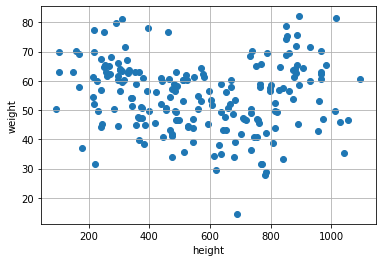

In [4]:
#use this cell if you would like as well
plt.scatter(df.height, df.weight)
plt.xlabel('height');
plt.ylabel('weight');
plt.grid();

Now that we've got a dataset, let's look at some options for scaling the data.  As well as how the data might be scaled.  There are two very common types of feature scaling that we should discuss:


**I.  MinMaxScaler**

In some cases it is useful to think of your data in terms of the percent they are as compared to the maximum value.  In these cases, you will want to use **MinMaxScaler**.

**II. StandardScaler**

Another very popular type of scaling is to scale data so that it has mean 0 and variance 1.  In these cases, you will want to use **StandardScaler**.  

It is probably more appropriate with this data to use **StandardScaler**.  However, to get practice with feature scaling methods in python, we will perform both.

`2.` First let's fit the **StandardScaler** transformation to this dataset.  I will do this one so you can see how to apply preprocessing in sklearn.

In [5]:
np_ss = p.StandardScaler().fit_transform(df) # Fit and transform the data
print(type(np_ss))

<class 'numpy.ndarray'>


In [6]:
df_ss = pd.DataFrame(np_ss) #create a dataframe
df_ss.columns = ['height', 'weight'] #add column names again
print('----------------------------------')
print('mead = 0 / std = 1 になっている')
print('----------------------------------')
print(df_ss.describe())

----------------------------------
mead = 0 / std = 1 になっている
----------------------------------
             height        weight
count  2.000000e+02  2.000000e+02
mean  -1.008083e-15  1.483258e-15
std    1.002509e+00  1.002509e+00
min   -1.935180e+00 -3.370670e+00
25%   -8.613157e-01 -6.791951e-01
50%   -9.725856e-02  1.343178e-01
75%    8.264097e-01  6.828463e-01
max    2.137205e+00  2.285421e+00


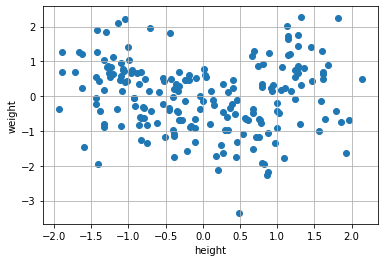

In [7]:
plt.scatter(df_ss['height'], df_ss['weight']); # create a plot
plt.xlabel('height');
plt.ylabel('weight');
plt.grid();

`3.` Now it's your turn.  Try fitting the **MinMaxScaler** transformation to this dataset. You should be able to use the previous example to assist.

In [8]:
# fit and transform
np_mm = p.MinMaxScaler().fit_transform(df)

In [17]:
#create a dataframe
df_mm = pd.DataFrame(np_mm)

In [18]:
#change the column names
df_mm.columns = ['height', 'weight']
print('----------------------------------')
print('min = 0 / max = 1 になっている')
print('----------------------------------')
print(df_mm.describe())

----------------------------------
min = 0 / max = 1 になっている
----------------------------------
           height      weight
count  200.000000  200.000000
mean     0.475196    0.595936
std      0.246173    0.177244
min      0.000000    0.000000
25%      0.263694    0.475854
50%      0.451313    0.619684
75%      0.678126    0.716664
max      1.000000    1.000000


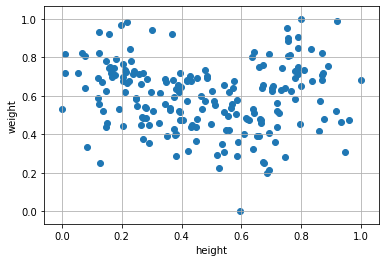

In [11]:
#plot the data
plt.scatter(df_mm.height, df_mm.weight);
plt.xlabel('height');
plt.ylabel('weight');
plt.grid();

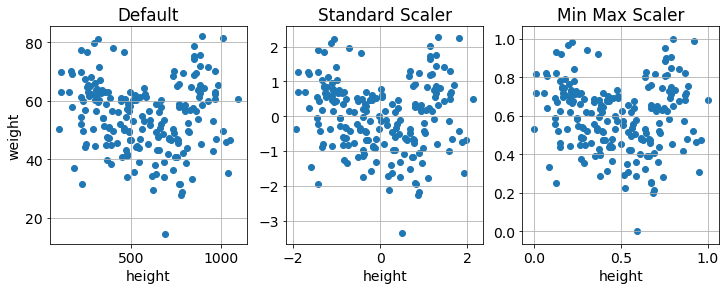

In [20]:
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size']      = 14
#
plt.figure()
plt.subplot(1,3,1)
plt.scatter(df.height, df.weight);
plt.xlabel('height');
plt.ylabel('weight');
plt.title('Default')
plt.grid();
#
plt.subplot(1,3,2)
plt.scatter(df_ss.height, df_ss.weight);
plt.xlabel('height');
plt.title('Standard Scaler')
plt.grid();
#
plt.subplot(1,3,3)
plt.scatter(df_mm.height, df_mm.weight);
plt.xlabel('height');
plt.title('Min Max Scaler')
plt.grid();


`4.`  Now let's take a look at how kmeans divides the dataset into different groups for each of the different scalings of the data.  Did you end up with different clusters when the data was scaled differently?

In [13]:
def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)
    
    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

In [14]:
# K-Means　というClassifierを作成
centers = 10
model   = KMeans(centers)

In [15]:
# データを分類
labels_df    = model.fit_predict(df)
print('score : df    = ', model.score(df))

labels_df_ss = model.fit_predict(df_ss)
print('score : df_ss = ', model.score(df_ss))

labels_df_mm = model.fit_predict(df_mm)
print('score : df_mm = ', model.score(df_mm))

score : df    =  -159809.96218447876
score : df_ss =  -41.23911555682751
score : df_mm =  -1.773191373240888


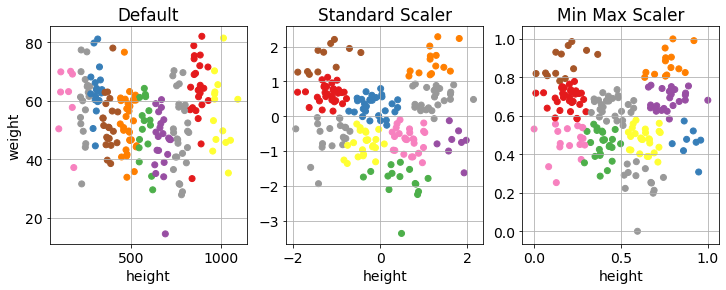

In [21]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['font.size']      = 14
#
plt.figure()
plt.subplot(1,3,1)
plt.scatter(df.height, df.weight, c=labels_df, cmap='Set1');
plt.xlabel('height');
plt.ylabel('weight');
plt.title('Default')
plt.grid();
#
plt.subplot(1,3,2)
plt.scatter(df_ss.height, df_ss.weight, c=labels_df_ss, cmap='Set1');
plt.xlabel('height');
plt.title('Standard Scaler')
plt.grid();
#
plt.subplot(1,3,3)
plt.scatter(df_mm.height, df_mm.weight, c=labels_df_mm, cmap='Set1');
plt.xlabel('height');
plt.title('Min Max Scaler')
plt.grid();

**Different from what was stated in the video - In this case, the scaling did end up changing the results.  In the video, the kmeans algorithm was not refit to each differently scaled dataset.  It was only using the one clustering fit on every dataset.  In this notebook, you see that clustering was recomputed with each scaling, which changes the results!**